In [ ]:
pip install opencv-python opencv-python-headless scikit-image matplotlib

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

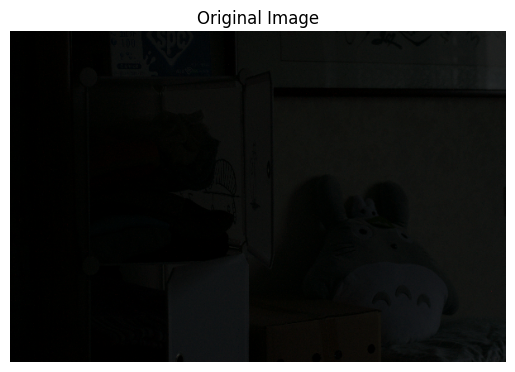

In [ ]:
# Load the low-light image (in grayscale or RGB)
image = cv2.imread('/content/23.png', cv2.IMREAD_COLOR)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

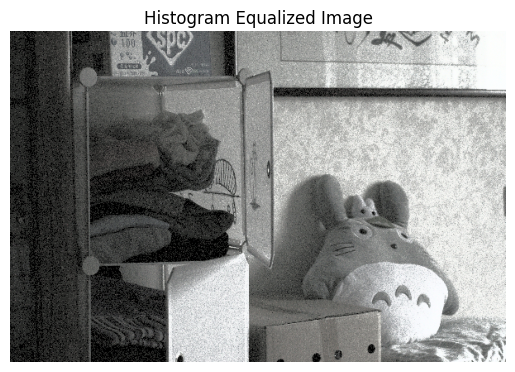

In [ ]:
# basic histogram Equalisation
ycrcb_img = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(ycrcb_img)

hist, bins = np.histogram(Y.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
Y_equalized = np.interp(Y.flatten(), bins[:-1], cdf_normalized).reshape(Y.shape).astype(np.uint8)
equalized_ycrcb = cv2.merge([Y_equalized, Cr, Cb])

equalized_img = cv2.cvtColor(equalized_ycrcb, cv2.COLOR_YCrCb2RGB)
plt.imshow(equalized_img)
plt.title('Histogram Equalized Image')
plt.axis('off')  # Hide axis
plt.show()


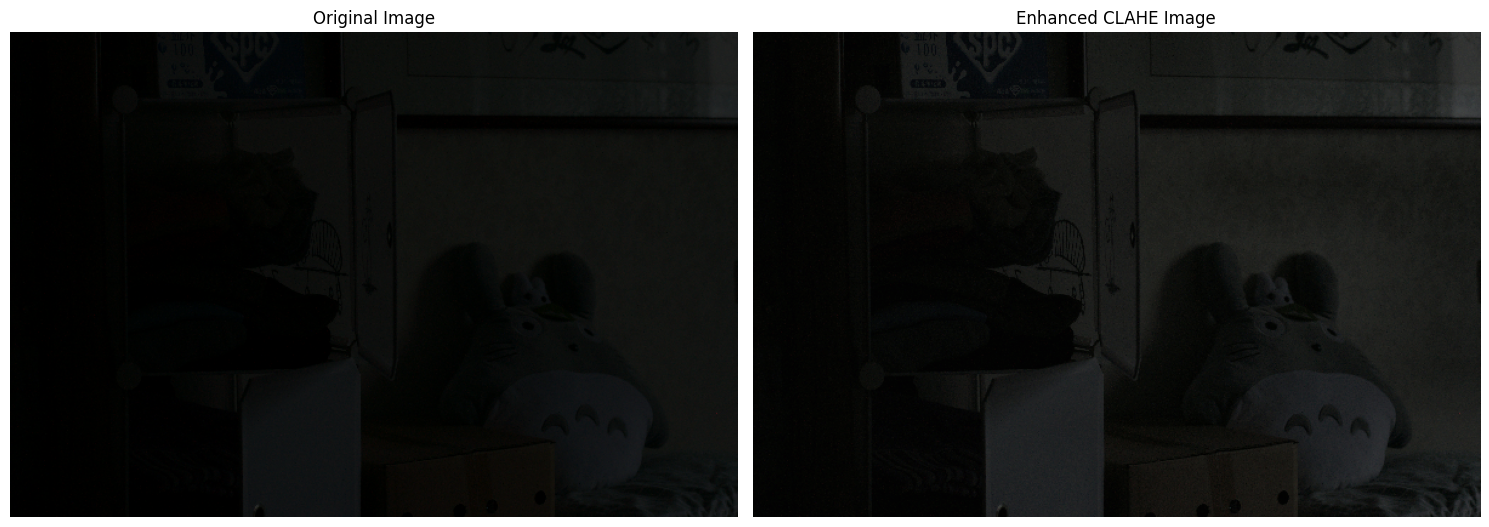

In [ ]:
# CLAHE
ycrcb_img = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(ycrcb_img)
clip_limit = np.percentile(Y, 90) / 255 * 3
clip_limit = max(1.0, min(clip_limit, 3.0))

clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(8, 8))
clahe_Y = clahe.apply(Y)
clahe_img = cv2.merge([clahe_Y, Cr, Cb])
clahe_img = cv2.cvtColor(clahe_img, cv2.COLOR_YCrCb2RGB)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))

axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(clahe_img)
axs[1].set_title('Enhanced CLAHE Image')
axs[1].axis('off')

plt.tight_layout()
plt.show()


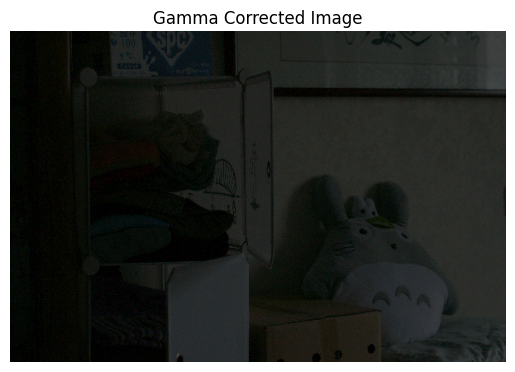

In [ ]:
# Gamma correction function
def gamma_correction(img, gamma):
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255 for i in np.arange(0, 256)]).astype('uint8')
    return cv2.LUT(img, table)

gamma_img = gamma_correction(image, 1.5)
gamma_img_rgb = cv2.cvtColor(gamma_img, cv2.COLOR_BGR2RGB)

plt.imshow(gamma_img_rgb)
plt.title('Gamma Corrected Image')
plt.axis('off')
plt.show()


In [ ]:
# Perform histogram matching using the original image and the reference image
reference_image_path = '/content/reference_image.jpg'  # Update the path to your reference image
reference_image = cv2.imread(reference_image_path)
reference_image_rgb = cv2.cvtColor(reference_image, cv2.COLOR_BGR2RGB)

# Apply histogram matching
matched_image = exposure.match_histograms(image_rgb, reference_image_rgb, multichannel=True)

# Display the histogram matched image
plt.figure(figsize=(10, 10))
plt.imshow(matched_image)
plt.title('Histogram Matched Image')
plt.axis('off')
plt.show()


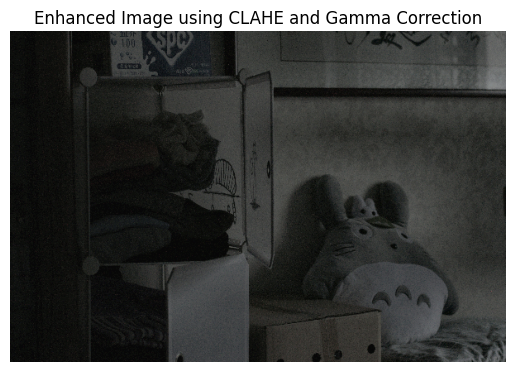

In [ ]:
# CLAHE and gamma correction
ycrcb_img = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(ycrcb_img)

clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
clahe_Y = clahe.apply(Y)

clahe_img = cv2.merge([clahe_Y, Cr, Cb])
clahe_img_rgb = cv2.cvtColor(clahe_img, cv2.COLOR_YCrCb2RGB)

gamma = 1.2
clahe_img_final = np.clip(255 * (clahe_img_rgb / 255) ** (1 / gamma), 0, 255).astype(np.uint8)

plt.imshow(clahe_img_final)
plt.title('Enhanced Image using CLAHE and Gamma Correction')
plt.axis('off')
plt.show()


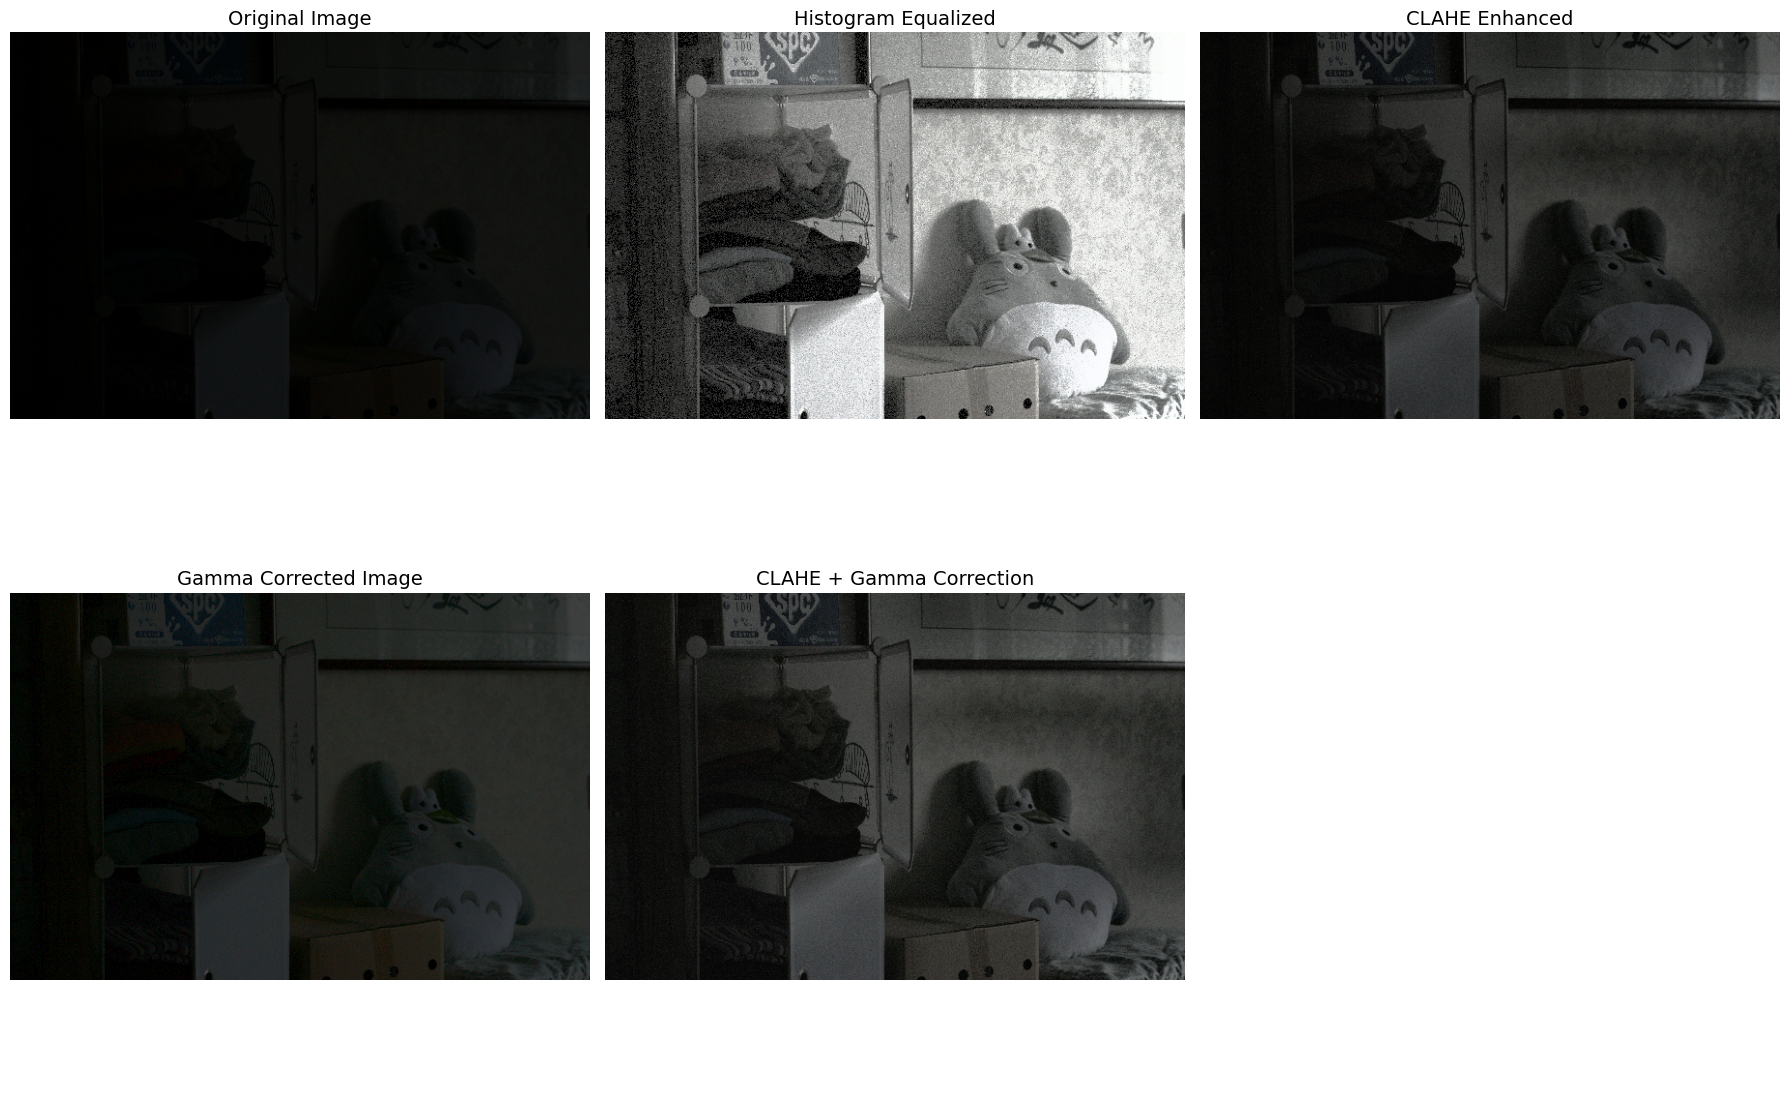

In [ ]:
# Final comparison displaying all images in a 2x3 grid for better formatting
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Display Original Image
axs[0, 0].imshow(image_rgb)
axs[0, 0].set_title('Original Image', fontsize=14)
axs[0, 0].axis('off')  # Hide axis

# Display Histogram Equalized Image
axs[0, 1].imshow(equalized_img)
axs[0, 1].set_title('Histogram Equalized', fontsize=14)
axs[0, 1].axis('off')  # Hide axis

# Display CLAHE Enhanced Image
axs[0, 2].imshow(clahe_img_rgb)
axs[0, 2].set_title('CLAHE Enhanced', fontsize=14)
axs[0, 2].axis('off')  # Hide axis

# Display Gamma Corrected Image (direct)
axs[1, 0].imshow(gamma_img_rgb)
axs[1, 0].set_title('Gamma Corrected Image', fontsize=14)
axs[1, 0].axis('off')  # Hide axis

# Display CLAHE + Gamma Correction Image
axs[1, 1].imshow(clahe_img_final)
axs[1, 1].set_title('CLAHE + Gamma Correction', fontsize=14)
axs[1, 1].axis('off')  # Hide axis


# Leave the last cell empty (optional)
axs[1, 2].axis('off')  # Empty space

# Add spacing between images
plt.subplots_adjust(wspace=0.2, hspace=0.3)

# Show the final comparison grid
plt.tight_layout()
plt.show()

